In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


# Recorte centralizado na imagem
def corte_central(img, dimension=()):
    # Dimensões da imagem
    width = img.shape[1]
    height = img.shape[0]

    # Dimensões da área de recorte
    cut_height = dimension[0]
    cut_width = dimension[1]

    # Obtendo as coordenadas para centralizar a área recortada
    y = (height - cut_height) // 2
    x = (width - cut_width) // 2

    # Recorte
    img_cut = img[y:y+cut_height, x:x+cut_width]
    return img_cut


# Encontrando pixels com valor iguais ao especificado na imagem e recortando
def cut_digit_region(img, pixel_value, margin=10):
    # Retorna as coordenadas onde o valor é igual ao de pixel_value
    points = np.argwhere(img == pixel_value)
    points = np.fliplr(points)
    x, y, w, h = cv2.boundingRect(points)

    # Desconbrindo o maior lado para transformar a área de recorte em um quadrado
    if w > h:
        # y recebe nova coordenada para manter a região de recorte centralizada
        y = y - ((w - h) // 2)

        # Altura recebe o valor da largura
        h = w
    else:
        # x recebe nova coordenada para manter a região de recorte centralizada
        x = x - ((h - w) // 2)

        # Largura recebe o valor da altura
        w = h

    # Acrescentando margem à imagem
    x = x - margin
    y = y - margin
    w = w + (margin * 2)
    h = h + (margin * 2)

    # Verificando se as coordenadas respeitam os limites da imagem
    if x < 0:
        x = 0
    if y < 0:
        y = 0
    if (x + w) > img.shape[1]:
        x = img.shape[1] - w
    if (y + h) > img.shape[0]:
        y = img.shape[0] - h

    # Cortando
    img_cropped = img[y:y+h, x:x+w]
    return img_cropped


# Função para pre-processar uma imagem
def processar(img):
    # 1 - Recorte da área de interesse
    largura = img.shape[1] // 2
    altura = img.shape[0] // 2
    img_roi = corte_central(img, altura, largura)

    # 2 - Borramento Gaussiano para atenuar o ruído da imagem
    img_gaussian_filter = cv2.GaussianBlur(img_roi, (7, 7), 0)

    # 3 - Aplicando limiar
    img_thresholded = cv2.adaptiveThreshold(img_gaussian_filter, 255,
                                            cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY_INV, 41, 5)

    # 4 - Recorte retangular na na região do papel na imagem
    paper_region = cut_digit_region(img_thresholded, 255, -150)

    # 5 - Opening, erosão seguido de dilatação (para remocão de artefatos e ruído)
    kernel = np.ones((4, 4), np.uint8)
    opening = cv2.morphologyEx(paper_region, cv2.MORPH_OPEN, kernel)

    # Dilatação
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.dilate(opening, kernel, iterations = 1)

    # 6 - Corte do dígito
    cropped_digit_image = cut_digit_region(opening, 255, 15)

    # TODO: Procurar outra forma de implementar o anti-aliasing
    # 7 - Borramento Gaussiano para suavizar as bordas do dígito
    cropped_digit_image_inverted = cv2.GaussianBlur(cropped_digit_image, (5, 5), 0)

    # 8 - Redimensionando a imagem e convertendo para np.array
    img_resized = cv2.resize(cropped_digit_image_inverted, (28, 28), cv2.INTER_LINEAR)
    img_reshaped = img_resized.reshape((28, 28))
    img_np_array = np.array(img_reshaped)
    return img_np_array


# Expandir dimensões da imagem
def expand_dims(img):
    exp1 = np.expand_dims(img, axis=0)
    exp2 = np.expand_dims(exp1, axis=exp1.ndim)
    return exp2


# Plota uma imagem
def plot_image(img, cm):
    plt.imshow(img, cm)
    plt.xticks([])
    plt.yticks([])



In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


class Preprocessamento:

    def __init__(self):
        pass


    # Recorte centralizado na imagem
    def corte_central(self, img, cut_height, cut_width):
        # Dimensões da imagem
        width_img = img.shape[1]
        height_img = img.shape[0]

        # Obtendo as coordenadas para centralizar a área recortada
        y = (width_img - cut_height) // 2
        x = (height_img - cut_width) // 2

        # Recorte
        img_cut = img[y:y+cut_height, x:x+cut_width]
        return img_cut


    # Encontrando pixels com valor iguais ao especificado na imagem e recortando
    def cut_digit_region(self, img, pixel_value, margin=10):
        # Retorna as coordenadas onde o valor é igual ao de pixel_value
        points = np.argwhere(img == pixel_value)
        points = np.fliplr(points)
        x, y, w, h = cv2.boundingRect(points)

        # Desconbrindo o maior lado para transformar a área de recorte em um quadrado
        if w > h:
            # y recebe nova coordenada para manter a região de recorte centralizada
            y = y - ((w - h) // 2)
            # Altura recebe o valor da largura
            h = w
        else:
            # x recebe nova coordenada para manter a região de recorte centralizada
            x = x - ((h - w) // 2)
            # Largura recebe o valor da altura
            w = h

        # Acrescentando margem à imagem
        x = x - margin
        y = y - margin
        w = w + (margin * 2)
        h = h + (margin * 2)

        # Verificando se as coordenadas respeitam os limites da imagem
        if x < 0:
            x = 0
        if y < 0:
            y = 0
        if (x + w) > img.shape[1]:
            x = img.shape[1] - w
        if (y + h) > img.shape[0]:
            y = img.shape[0] - h

        # Cortando
        img_cropped = img[y:y+h, x:x+w]
        return img_cropped


    def pre_processar(self, img):
        # 1 - Recorte da área de interesse
        largura = img.shape[1] // 2
        altura = img.shape[0] // 2
        img_roi = self.corte_central(img, altura, largura)

        # 2 - Borramento Gaussiano para atenuar o ruído da imagem bruta (a imagem ainda não foi binarizada)
        img_gaussian_filter = cv2.GaussianBlur(img_roi, (7, 7), 0)

        # 3 - Aplicando limiar
        img_thresholded = cv2.adaptiveThreshold(img_gaussian_filter, 255,
                                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                                cv2.THRESH_BINARY_INV, 41, 5)

        # 4 - Recorte retangular na região do papel na imagem
        paper_region = self.cut_digit_region(img_thresholded, 255, -150)

        # 5 - Opening, erosão seguido de dilatação (para remoção de artefatos e ruído)
        kernel = np.ones((4, 4), np.uint8)
        opening = cv2.morphologyEx(paper_region, cv2.MORPH_OPEN, kernel)

        # 6 - Dilatação
        kernel = np.ones((5, 5), np.uint8)
        opening = cv2.dilate(opening, kernel, iterations=1)

        # 7 - Corte do dígito
        cropped_digit_image = self.cut_digit_region(opening, 255, 15)

        # TODO: Procurar outra forma de implementar o anti-aliasing
        # 8 - Borramento Gaussiano para suavizar as bordas do dígito
        cropped_digit_image_inverted = cv2.GaussianBlur(cropped_digit_image, (5, 5), 0)

        # 9 - Redimensionando a imagem e convertendo para np.array
        img_resized = cv2.resize(cropped_digit_image_inverted, (28, 28), cv2.INTER_LINEAR)
        img_reshaped = img_resized.reshape((28, 28)).astype('float32')
        img_np_array = np.array(img_reshaped)
        return img_np_array


    # Expandir as dimensões da imagem pre-processada
    def expandir_dims(self, img):
        img_expanded = np.expand_dims(img, axis=0)
        img_expanded2 = np.expand_dims(img_expanded, axis=img_expanded.ndim)
        return img_expanded2


if __name__ == '__main__':
    pass


In [3]:
# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 40
max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

    print(type(lp_model.classes_))
    print(lp_model.classes_.shape)
    break

    print("Iteration %i %s" % (i, 70 * "_"))
    print(
        "Label Spreading model: %d labeled & %d unlabeled (%d total)"
        % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
    )

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)
    ][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([], dtype=int)

    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(
            0.05,
            (1 - (i + 1) * 0.183),
            "model %d\n\nfit with\n%d labels" % ((i + 1), i * 5 + 10),
            size=10,
        )

    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
            sub.set_title(
                "predict: %i\ntrue: %i"
                % (lp_model.transduction_[image_index], y[image_index]),
                size=10,
            )
            sub.axis("off")

        # labeling 5 points, remote from labeled set
        (delete_index,) = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle(
    "Active learning with Label Propagation.\nRows show 5 most "
    "uncertain labels to learn with the next model.",
    y=1.15,
)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2, hspace=0.85)
plt.show()

<class 'numpy.ndarray'>
(10,)


<Figure size 640x480 with 0 Axes>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


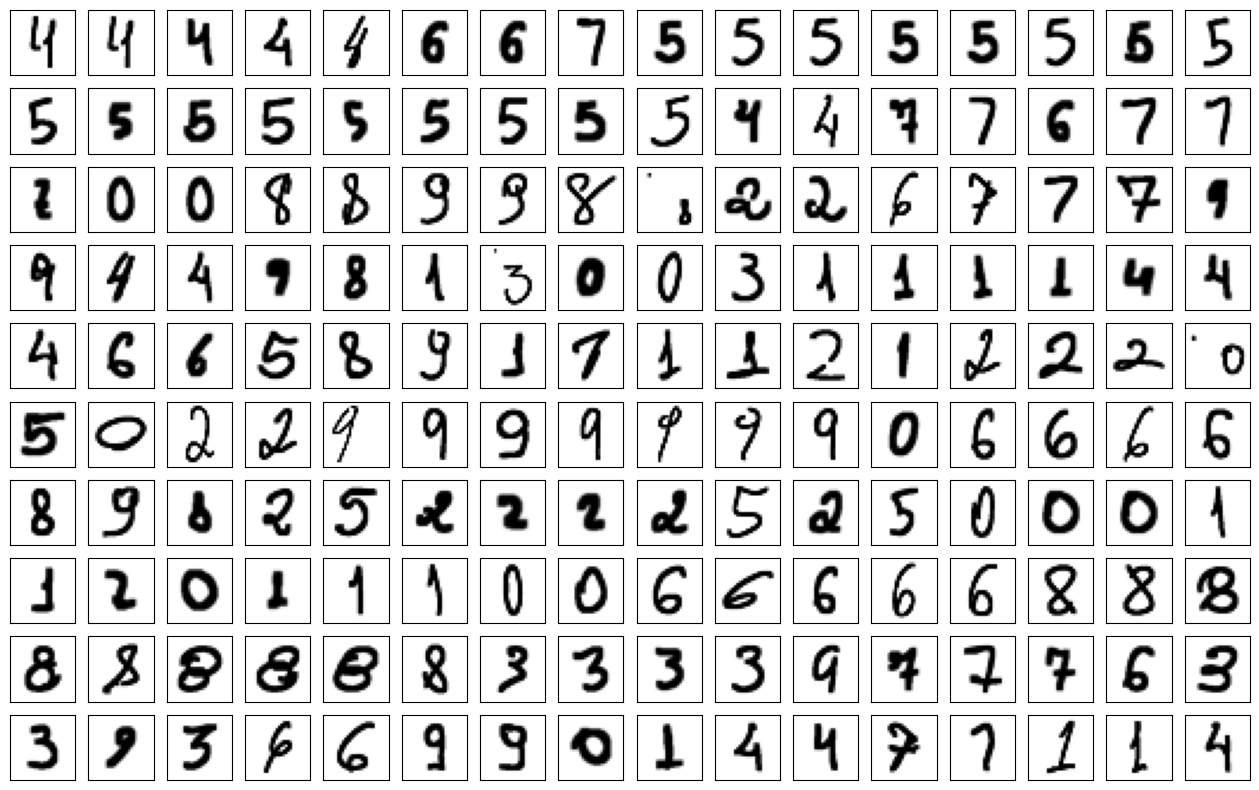

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-10-4c3ec9cf698b>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 16, i + 1)


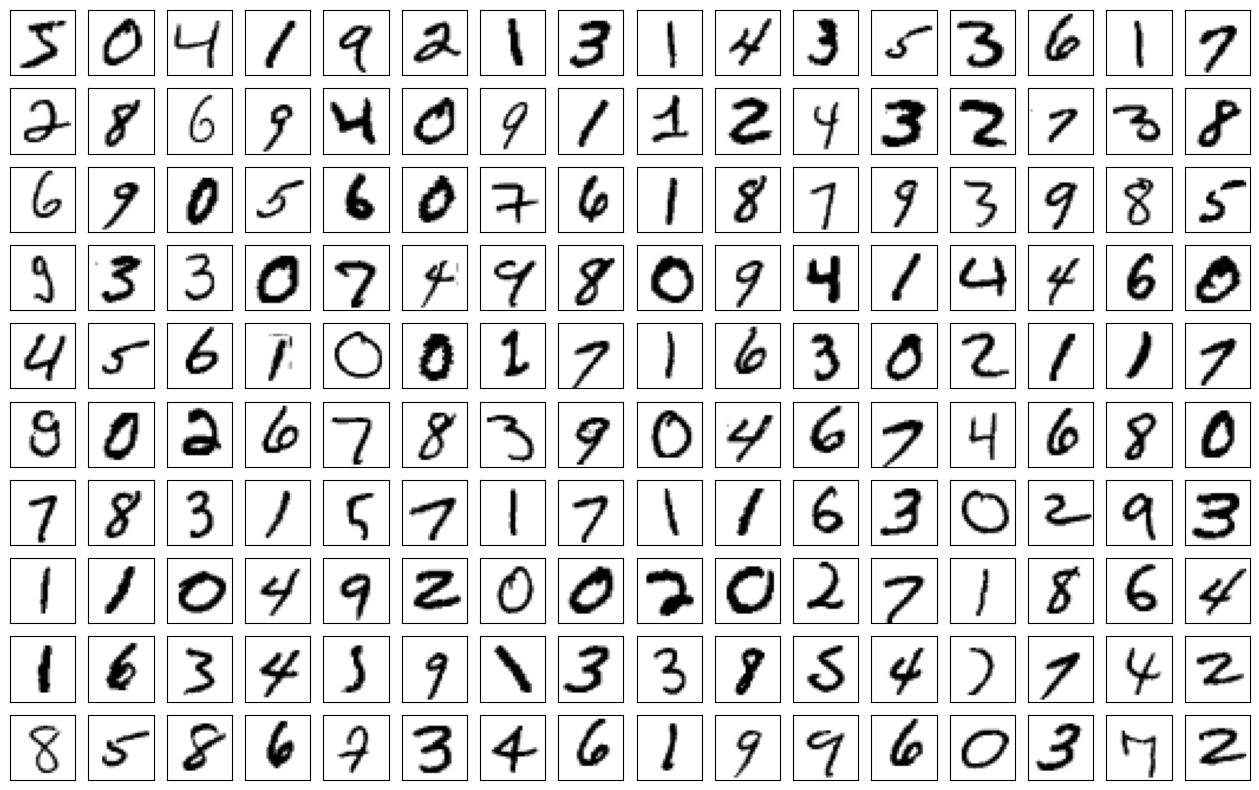

In [10]:
import os
path = 'IMAGES_PATH'
file_list = os.listdir(path)

plt.figure(figsize=(16, 10))
for i in range(160):
    img_path = path + f'/{i}.jpg'
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_processed = preprocess.pre_processar(img)
    plt.subplot(10, 16, i + 1)
    plot_image(img_processed, 'binary')
plt.show()

from tensorflow import keras
mnist = keras.datasets.mnist
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

plt.figure(figsize=(16, 10))
plt.title('Dataset MNIST')
for i in range(160):
    plt.subplot(10, 16, i + 1)
    plot_image(x_treino[i], 'binary')
plt.show()


In [ ]:
path = r'MODEL_PATH'
model = tf.keras.models.load_model(path + 'model_squeeze_50_epoch/model_squeeze_45.h5')
preprocess = Preprocessamento()
matriz_confusao = np.zeros((10, 10))

from sklearn.metrics import confusion_matrix

list_predicts = list()
correct_labels = list()

for digito in range(0, 10):
    path_digito = path + 'imgs/' + f'{digito:0>2}/'
    file_name_list = sorted(os.listdir(path_digito))

    for file_name in file_name_list:
        img = cv2.imread(path_digito + file_name, cv2.IMREAD_GRAYSCALE)
        img_processed = preprocess.pre_processar(img)
        img_expanded = preprocess.expandir_dims(img_processed)
        array_prediction = model.predict(img_expanded)
        num = np.argmax(array_prediction)
        list_predicts.append(num)
        correct_labels.append(digito)

predicts = np.array(list_predicts)
correct_labels = np.array(correct_labels)
cm = confusion_matrix(correct_labels, predicts, labels=np.arange(10))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      0.82      0.85        17
           2       0.55      0.94      0.70        17
           3       0.45      0.82      0.58        11
           4       1.00      0.80      0.89        15
           5       0.79      1.00      0.88        22
           6       0.80      0.22      0.35        18
           7       0.93      0.76      0.84        17
           8       0.93      0.82      0.87        17
           9       0.64      0.50      0.56        18

    accuracy                           0.76       166
   macro avg       0.80      0.76      0.75       166
weighted avg       0.80      0.76      0.75       166

Matriz de Confusao


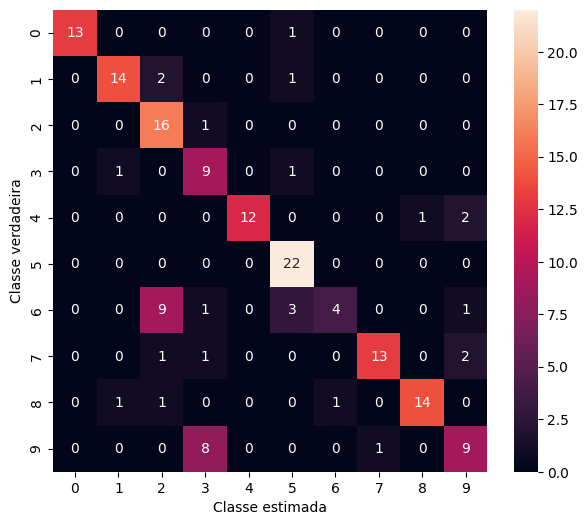

In [7]:
import seaborn as sn
import sklearn.metrics
#from sklearn.metrics import plot_confusion_matrix

print(classification_report(correct_labels, predicts))

print('Matriz de Confusao')
plt.figure(figsize=(7,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Classe estimada')
plt.ylabel('Classe verdadeira')
plt.show()


In [8]:
#Predições da raspberry
import pickle as pkl
file_path = '../lista_predicts45.pkl'

with open(file_path, 'rb') as arquivo:
    predicts_lab = pkl.load(arquivo)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      0.82      0.85        17
           2       0.55      0.94      0.70        17
           3       0.45      0.82      0.58        11
           4       1.00      0.80      0.89        15
           5       0.79      1.00      0.88        22
           6       0.80      0.22      0.35        18
           7       0.93      0.76      0.84        17
           8       0.93      0.82      0.87        17
           9       0.64      0.50      0.56        18

    accuracy                           0.76       166
   macro avg       0.80      0.76      0.75       166
weighted avg       0.80      0.76      0.75       166



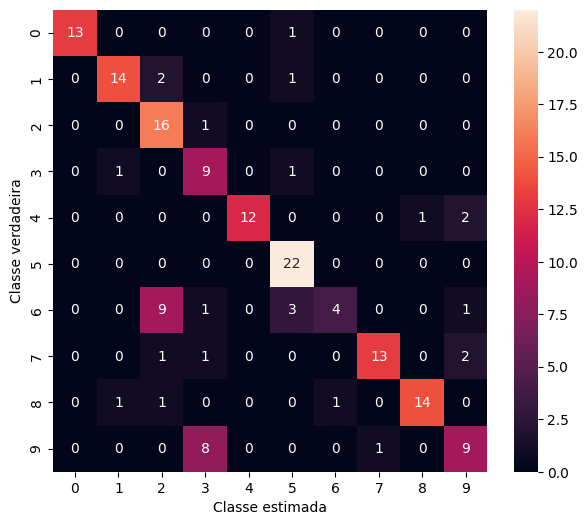

In [9]:
true_labels = list()
predicts_model_lab = list()

for i, v in enumerate(predicts_lab):
    for j in v:
        true_labels.append(i)
        num = np.argmax(j)
        predicts_model_lab.append(num)

cm_lab = confusion_matrix(true_labels, predicts_model_lab)
print(classification_report(true_labels, predicts_model_lab))
plt.figure(figsize=(7,6))
sn.heatmap(cm_lab, annot=True)
plt.xlabel('Classe estimada')
plt.ylabel('Classe verdadeira')
plt.show()
